# KIVA DATA ANALYSIS + INDIA'S STORY WITH NEIGHBOURS

<img src='https://drive.google.com/uc?id=1x9xLpLMbMDwInwoaeiE977Jd3VJXZ65K' width=1000 >

# About Notebook:-
#### In this notebook I'm analysising Kiva Dataset. Kiva.org is an online crowdfunding platform to extend financial services to  poor and financially excluded people around the world. Kiva lenders have provided over 1 billion dollars in loans to over 2 million people. In order to set investment priorities, help inform lenders, and understand their target communities, knowing the level of poverty of each borrower is critical. However, this requires inference based on a limited set of information for each borrower.
#### There are some questions, which I'm analysising, are given below:-

* Q1). Top 10 Countires that got maximum number of times Loan.
* Q2). Let's create wordcloud for the countries according to the number of times they got loan.
* Q3). Top 10 Countries that got maximum amount of total loan.
* Q4). Top 10 Sectors that got maximum amount of total loan.
* Q5). Top 10 Activity that got maximum amount of total loan.
* Q6). Loan Amount Distribution.
* Q7). Let's get insight about the Repayment interval of loans.
* Q8). Let's get information about the lender count.
* Q9). Gender Distribution of Borrower.
* Q10). For which durations(month) maximum number of loans are there.
* Q11). Top 10 Countries with highest MPI (Multidimentional Poverty Index).
* Q12). Top 10 Countries with low MPI (Multidimentional Poverty Index).
* Q13). MPI on World Map.
* Q14). Time Series Analysis of funded amount.
* Q15). India's Loan distribution with neighbour countries.
* Q16). Top 10 sectors , that got maximum amount of loan in India.
* Q17). Top 10 Activities , that got maximum amount of loan in India.
* Q18). Top 10 Cities , that got maximum amount of loan in India.
* Q19). Gender Distribution for borrower in India.
* Q20). Number of Times Loans were given to India and it's neighbour.
* Q21). Repayment Interval of Loans to India.
* Q22). Top 10 Cities that got maximum number of times loan from India and it's neighbour.
* Q23). Regions of India that got loans, Ploting on map.

In [105]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from plotly.offline import download_plotlyjs, iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.plotly as py
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline
plt.style.use('ggplot')

In [106]:
# Let's see the number of dataset and their name we have
try:
    dataset = os.listdir('input')
    for var in dataset:
        print(var)
except Exception as e :
    dataset = os.listdir('../input')
    for var in dataset:
        print(var)

kiva_mpi_region_locations.csv
loan_themes_by_region.csv
loan_theme_ids.csv
kiva_loans.csv


In [107]:
# loading datasets

try:
    df_kiva_loans = pd.read_csv('input/kiva_loans.csv')
    df_kiva_mpi = pd.read_csv('input/kiva_mpi_region_locations.csv')
    df_loan_region = pd.read_csv('input/loan_themes_by_region.csv')
    df_loan_ids = pd.read_csv('input/loan_theme_ids.csv')

except Exception as e:
    df_kiva_loans = pd.read_csv('../input/kiva_loans.csv')
    df_kiva_mpi = pd.read_csv('../input/kiva_mpi_region_locations.csv')
    df_loan_region = pd.read_csv('../input/loan_themes_by_region.csv')
    df_loan_ids = pd.read_csv('../input/loan_theme_ids.csv')

In [108]:
# let's see the kiva_loan dataset.
df_kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [109]:
# let's see the kiva_mpi_region_location dataset.
df_kiva_mpi.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [110]:
# let's see the kiva_loan_theme_id dataset.
df_loan_ids.head()

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0
3,641019,a1050000002X1ij,Higher Education,160.0
4,641594,a1050000002VbsW,Subsistence Agriculture,336.0


In [111]:
# let's see the kiva_loan_theme_by_region dataset.

df_loan_region.head()

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,number,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,1,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,58,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,7,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,1383,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,3,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


#### Let's see the statistical information about numerical values

In [112]:

df_kiva_loans.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


#### Let's see the statistical information about categorical values

In [113]:
df_kiva_loans.describe(include=[np.object])

,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date
count,671205,671205,666973,671197,671205,614405,671205,671205,668809,622874,499789,666984,671205,671205
unique,163,15,424912,86,87,12695,67,667399,5719,498007,86719,11298,4,1298
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,user_favorite,female,monthly,2017-03-20
freq,72955,180302,5217,160441,160441,10000,160440,25,2800,33,27088,426502,342717,1308


#### Let's get the information about the missing values.

In [114]:

null = df_kiva_loans.isnull().sum()
null_per = (null/len(df_kiva_loans))*100
null_per = pd.DataFrame(data={'Columns':null.index,'Number of Null values':null.values, 'Percentage of null value':null_per.values})
null_per

,Columns,Number of Null values,Percentage of null value
0,id,0,0.000000
1,funded_amount,0,0.000000
2,loan_amount,0,0.000000
3,activity,0,0.000000
4,sector,0,0.000000
5,use,4232,0.630508
6,country_code,8,0.001192
7,country,0,0.000000
8,region,56800,8.462392
9,currency,0,0.000000


* As one can see 25% null values, which is maximum, is in tags column.
* Other columns have less than 10% null values.
* No need to remove null values.

#### =====================================================================================================

# LOAN ANALYSIS

### Q1). Top 10 Countires that got maximum number of times Loan.

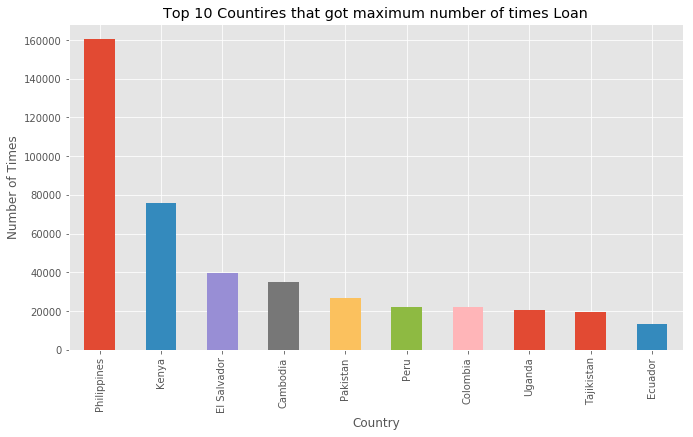

In [115]:

df_kiva_loans['country'].value_counts()[:10].plot(kind='bar', figsize=(11,6))
plt.title('Top 10 Countires that got maximum number of times Loan')
plt.xlabel('Country')
plt.ylabel('Number of Times')
plt.show()

* As one can see Philippines got maximum number of times loan followed by Kenya and then by El Salvador.
* India's neighbourer Pakisthan is also in the list at 5th position.


#### =====================================================================================================

### Q2). Let's create wordcloud for the countries according to the number of times they got loan.

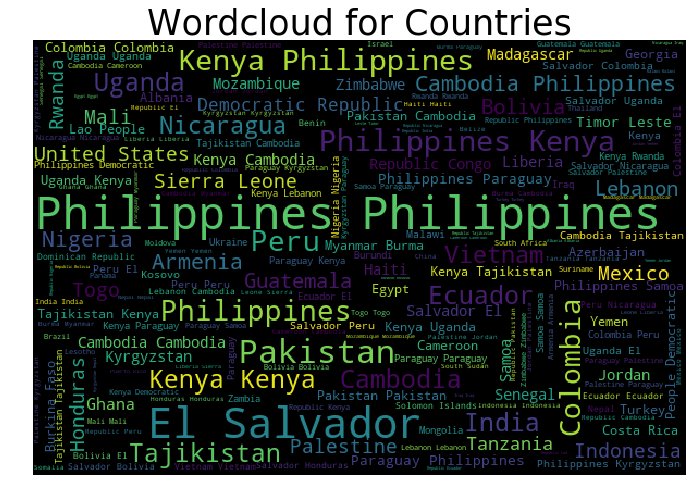

In [116]:
from wordcloud import WordCloud

names = df_kiva_loans['country'][pd.notnull(df_kiva_loans['country'])]
wc = WordCloud(width=600, height=400, max_font_size=50).generate(' '.join(names))
plt.figure(figsize=(16,8))
plt.title('Wordcloud for Countries', fontsize=35)
plt.imshow(wc)
plt.axis('off')
plt.show()

#### ====================================================================================================

### Q3). Top 10 Countries that got maximum amount of total loan.


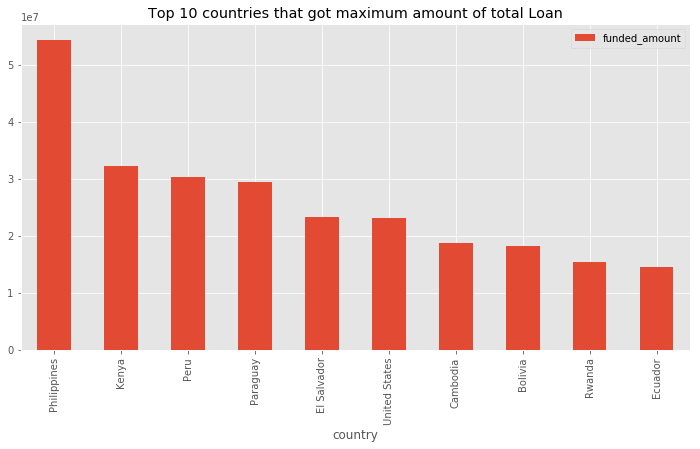

In [117]:
# Using groupby function here.
country = df_kiva_loans.groupby('country')['funded_amount'].sum().reset_index()
country.sort_values('funded_amount',ascending=False, inplace=True)
country = country[:10]
country.set_index('country', drop=True, inplace=True,)

country.plot(kind='bar', figsize=(12,6), title='Top 10 countries that got maximum amount of total Loan')

plt.show()

#### ==================================================================================================

### Q4). Top 10 Sectors that got maximum amount of total loan.

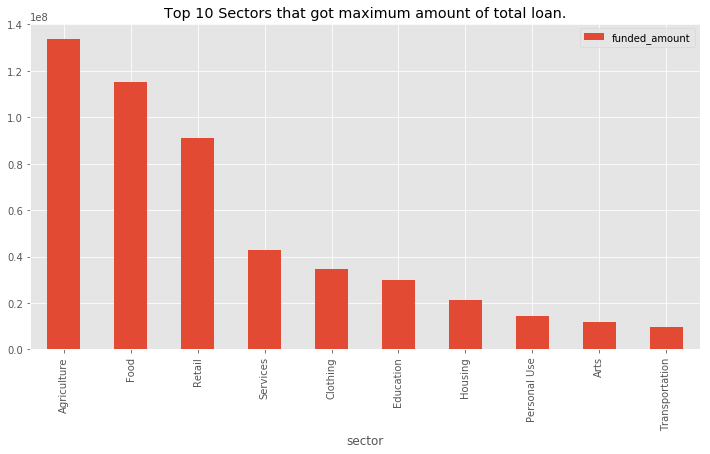

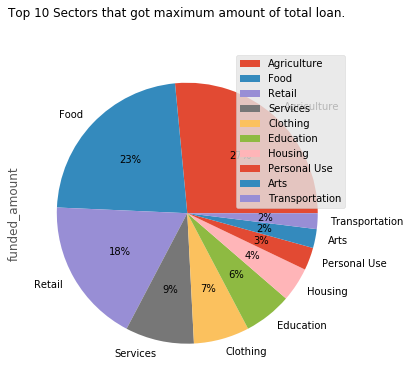

In [118]:
# Using groupby function here.

sector = df_kiva_loans.groupby('sector')['funded_amount'].sum().reset_index()
sector.sort_values('funded_amount',ascending=False, inplace=True)
sector = sector[:10]
sector.set_index('sector', drop=True, inplace=True,)


sector.plot(kind='bar',title='Top 10 Sectors that got maximum amount of total loan.', figsize=(12,6))
plt.show()
sector.plot(kind='pie',title='Top 10 Sectors that got maximum amount of total loan.',subplots=True, 
            figsize=(12,6), autopct='%.f%%') 
plt.show()

<img src='https://drive.google.com/uc?id=1MKwL5jSoIEkCe1wS-hUCtgBmv97OckY7' width=700>

#### ====================================================================================================

### Q5). Top 10 Activity that got maximum amount of total loan.

In [119]:
# Using groupby function here.

activity = df_kiva_loans.groupby('activity')['funded_amount'].sum().reset_index()
activity.sort_values('funded_amount',ascending=False, inplace=True)
activity = activity[:10]

# iplot for interactive plots.
activity.iplot(kind='bar',x='activity', y='funded_amount',
             title='Top 10 activity that got maximum amount of total loan.', xTitle='activity', yTitle='Amount' )
plt.show()
activity.iplot(kind='pie',title='Top 10 activity that got maximum amount of total loan.',
             labels='activity', values='funded_amount', pull=0.2, hole=0.2) 
plt.show()

* Maximum number of activities are related to farming and agriculture.


#### =====================================================================================================

### Q6). Loan Amount Distribution.

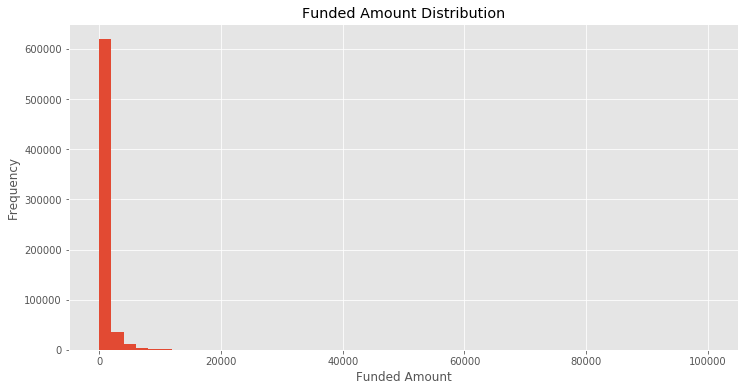

In [120]:
df_kiva_loans['funded_amount'].plot(kind='hist', bins=50, figsize=(12,6))
plt.xlabel('Funded Amount')
plt.title('Funded Amount Distribution')
plt.show()

#### The conclusions from the graph:- 
* As one can see there are some outliers in the distribution of funded amount.
* First we will remove this outliers.
* We will take funded amount in the range of 0 to 10000 dollar to see the distribution of funded amount.

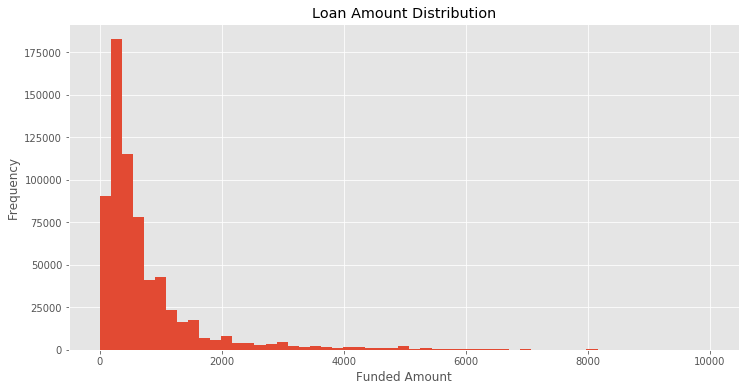

In [121]:
temp_df = df_kiva_loans[df_kiva_loans['funded_amount']<10000]
temp_df['funded_amount'].plot(kind='hist', figsize=(12,6), bins=55)
plt.xlabel('Funded Amount')
plt.title('Loan Amount Distribution')
plt.show()

* From this interactive graph one can say maximum number of times loans are in the range of 200 to 300 dollars.

#### ====================================================================================================

### 7). Let's get insight about the Repayment interval of loans.

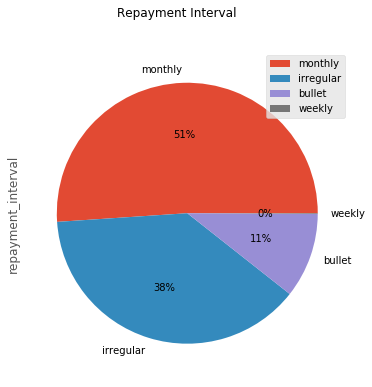

In [122]:
new_df = df_kiva_loans['repayment_interval'].value_counts().reset_index()
new_df.set_index('index', inplace=True, drop=True)
new_df.plot(kind='pie', subplots=True, title='Repayment Interval', autopct='%.f%%', figsize=(12,6))
plt.show()

* 51% are related to monthlt interval followed by 38% from irregular.

#### ====================================================================================================

### Q8). Let's get information about the lender count.
#### lender count = number of lender giving loan to a borrower.

* Maximum number of lenders are in the range of 0 to 200, so I am only checking the distribution of those only.
* Others may be treated as outliers.

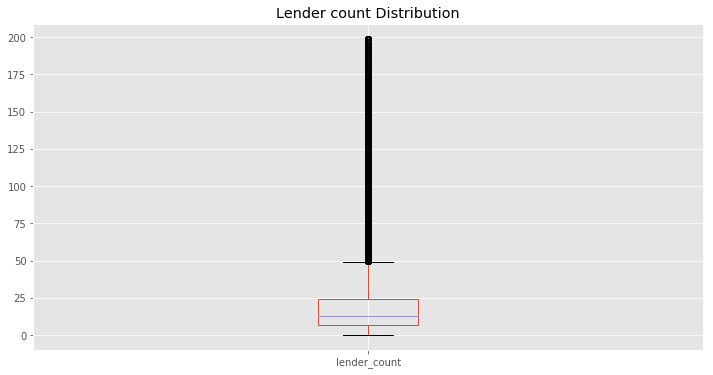

In [123]:
lender = df_kiva_loans[df_kiva_loans['lender_count']<200]
lender['lender_count'].plot(kind='box', figsize=(12,6), title='Lender count Distribution')
plt.show()

#### ====================================================================================================

### Q9). Gender Distribution of Borrower.

In [124]:
gender = df_kiva_loans['borrower_genders'].value_counts()[:2].reset_index()
gender.iplot(kind='pie', labels='index', values='borrower_genders', title='Gender Distribution of Borrower')
plt.show()

* Participation of females much higher than males.
* Female with 76% and male with 24%

#### ====================================================================================================

### Q10). For which durations(month) maximum number of loans are there.

In [125]:
months = df_kiva_loans['term_in_months'].value_counts()[:10].reset_index()
 
months.columns = ['Terms in Months','Frequency']
months.iplot(kind='bar', x='Terms in Months', y= 'Frequency', title='Terms of Months', 
             xTitle='Terms of Month', yTitle='Number of times')

* Maximum Number of times terms of loan is 14 or 8 in months.
* Approximately for 1 year.

#### ===================================================================================================

# MPI ANALYSIS

### Q11). Top 10 Countries with highest MPI (Multidimentional Poverty Index).

In [126]:
high_mpi = df_kiva_mpi.sort_values('MPI', ascending=False)[:10]
high_mpi.iplot(kind='bar', x='LocationName', y='MPI', title='Top 10 Countries with highest MPI', 
              xTitle='Country', yTitle='MPI')

* High MPI means high Poverty.
* 6 regions from Chad are in high MPI means they are highly poor regions.


#### =====================================================================================================

### Q12). Top 10 Countries with low MPI (Multidimentional Poverty Index).

In [127]:
low_mpi = df_kiva_mpi.sort_values('MPI', )[:10]
low_mpi.iplot(kind='bar', x='LocationName', y='MPI', title='Top 10 Countries with Low MPI', 
              xTitle='Country', yTitle='MPI')

#### ====================================================================================================

### Q13). MPI on World Map.

In [128]:
data = [{'lat': df_kiva_mpi['lat'] ,
  'lon': df_kiva_mpi['lon'] ,       
  'marker': {'color': df_kiva_mpi['MPI'] ,
   'line': {'color': 'rgb(40,40,40)', 'width': 0.5},
   'size': 5,
   'sizemode': 'diameter',
    'colorbar': dict(
            title = 'MPI', 
            thickness = 10,           
            outlinecolor = "rgba(68, 68, 68, 0)",            
            ticklen = 3,                       
            dtick = 0.1      )        },
  'text': df_kiva_mpi['LocationName'].astype(str) + '  ->  ' + df_kiva_mpi['MPI'].astype(str) + '  MPI' ,
  'type': 'scattergeo',
  
      }]


layout = go.Layout(
    title = 'MPI',
    showlegend = True,
    geo = dict(
            scope='world',
            projection=dict( type = 'natural earth'),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),)

fig =  go.Figure(layout=layout, data=data)
iplot( fig, validate=False)

#### ===================================================================================================

# TIME ANALYSIS

### Q 14). Time Series Analysis of funded amount.

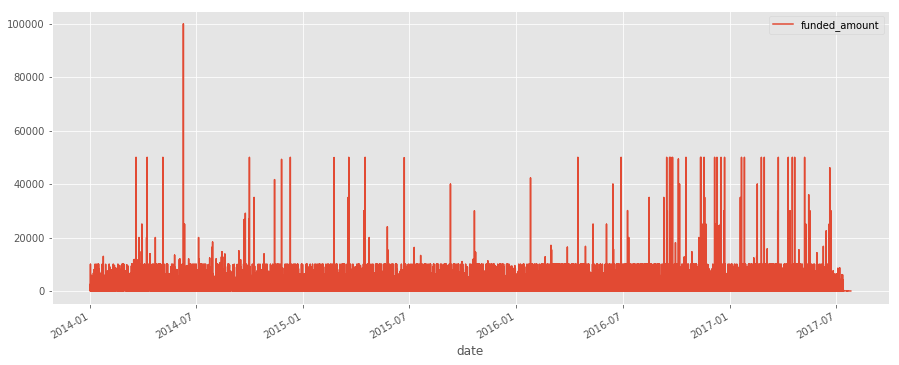

In [129]:
df_kiva_loans['date'] = pd.to_datetime(df_kiva_loans['date'])
temp_df = df_kiva_loans[['date','funded_amount']]
temp_df.set_index('date', drop=True, inplace=True)
temp_df.plot(figsize=(15,6))
plt.show()

#### =====================================================================================================

# INDIA AND IT'S NEIGHBOURS ANALYSIS

#### Creating new DataFrame which only contains data of India and it's neighbour.

In [130]:
neighbour = ['India' ,'Pakistan', 'China', 'Nepal', 'Bangladesh', 'Bhutan', 'Myanmar (Burma)', 'Afghanistan', 'Sri Lanka', ]
df_india = df_kiva_loans[df_kiva_loans['country'].isin(neighbour)]
print(df_india['country'].unique())
print("The data of Sri Lanka and Bangladesh is not there in kiva's dataset.")

['Pakistan' 'India' 'Nepal' 'Myanmar (Burma)' 'China' 'Afghanistan'
 'Bhutan']
The data of Sri Lanka and Bangladesh is not there in kiva's dataset.


### Q15). India's Loan distribution with neighbour countries.

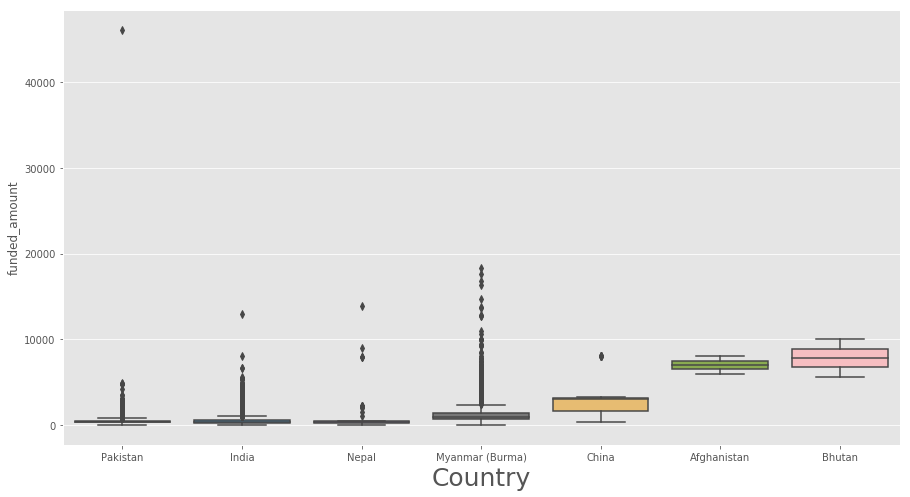

In [131]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_india, x='country', y='funded_amount')
plt.xlabel('Country', fontsize=25)
plt.show()

#### ==================================================================================================

### Q16). Top 10 sectors , that got maximum amount of loan in India. 

In [132]:
temp_df = df_india[df_india['country']=='India']
temp_df = temp_df['sector'].value_counts().reset_index()[:10]
temp_df.iplot(kind='pie', labels='index', values='sector', hole=0.2, pull=0.2, title='Top 10 Sectors')
plt.show()

* It's good to see agriculture sector and food sector on top 10, means they are getting good quantity of loan.
* Farmers can opt this method also to get loan.

#### =====================================================================================================

### Q17). Top 10 Activities , that got maximum amount of loan in India. 

In [133]:
activity = df_india[df_india['country']=='India']
activity = activity['activity'].value_counts().reset_index()[:10]
activity.iplot(kind='pie', labels='index', values='activity', hole=0.2, pull=0.2, title='Top1 10 Activity')
plt.show()

#### ====================================================================================================

### Q18). Top 10 Cities , that got maximum amount of loan in India. 

In [134]:
cities = df_india[df_india['country']=='India']
cities = cities['region'].value_counts().reset_index()[:10]
cities.iplot(kind='pie', labels='index', values='region', hole=0.2, pull=0.2, title='Top 10 City in India')
plt.show()

#### Let's plot them on India's map

In [135]:
top_cities = cities['index']
top_cities = top_cities.values
top_cities
new_df = df_loan_region[df_loan_region['region'].isin(top_cities)]
new_df['region'].unique()
lon = new_df['lon'].unique()
lon = np.append(lon,88.8215)
lat = new_df['lat'].unique()
lat = np.append(lat,26.5738)
names = new_df['region'].unique()
data = [{'lat': lat ,
  'lon': lon , 
  'locationmode':'country names' ,      
  'marker': {
   'line': {'color': 'rgb(40,40,40)', 'width': 0.5},
   'size': 5,
   'sizemode': 'diameter',
            },
  'text': names ,
  'type': 'scattergeo',
  
      }]


layout = go.Layout(
    title = 'Top 10 City in India',
    showlegend = True,
    geo = dict(
            scope='asia' ,
            projection=dict( type = 'natural earth'),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),)

fig =  go.Figure(layout=layout, data=data)
iplot( fig, validate=False)

#### ===================================================================================================

### Q 19). Gender Distribution for borrower in India.

In [136]:
temp_df = df_india[df_india['country']=='India']
temp_df = temp_df[temp_df['borrower_genders'].isin(['female', 'male']) ]
temp_df = temp_df['borrower_genders'].value_counts().reset_index()
temp_df.iplot(kind='pie', labels='index', values='borrower_genders', 
              hole=0.2, pull=0.2, title='Gender Distribution of India')
plt.show()

#### The conclusions from graph:-
* 97% are female from India.
* Female participation is high in India.
* Beti Bachao Beti Padhao.

<img src='https://drive.google.com/uc?id=114MGjz5H6M5ABY2zIq4LxWQVX2aXvVbN' width=500>

#### ==================================================================================================

### Q 20). Number of Times Loans were given to India and it's neighbour.

In [137]:
count = df_india['country'].value_counts().reset_index()
count.iplot(kind='pie', labels='index', values='country', pull=0.2, hole=0.2,
            title="Frequency of Loan to India and it's neighbour")
plt.show()

#### The conclusions from graph:-
* Pakistan got maximum number of times loan followed by India.
* China got very less number of times loan.
* People from Pakistan and India are giving more participation in their economy.

#### ===================================================================================================

### Q 21). Repayment Interval of Loans of  India.

In [138]:
rep_pay = df_india[df_india['country']=='India']
rep_pay = rep_pay['repayment_interval'].value_counts().reset_index()
rep_pay.iplot(kind='pie', labels='index', values='repayment_interval', pull=0.2, hole=0.2, 
             title='Repayment Interval of Loan of India')

#### =====================================================================================================

### Q 22). Top 10 Cities that got maximum number of times loan from India and it's neighbour.

In [139]:
region = df_india['region'].value_counts().reset_index()[:10]
region.iplot(kind='bar', x='index', y='region', title='Top 10 Region',
             xTitle='Region', yTitle='Number of times they got Loan')


#### ==================================================================================================

### Q23). Regions of India that got loans, Ploting on map.

In [140]:
india = df_india[df_india['country']=='India']
region = india['region'].unique()
temp_df = df_loan_region[df_loan_region['region'].isin(region)]

# Getting latitude, longitude and names of regions
lat = temp_df['lat'].unique()
lon = temp_df['lon'].unique()
names = temp_df['region'].unique()

# Ploting India's map
data = [{'lat': lat ,
  'lon': lon , 
  'locationmode':'country names' ,      
  'marker': {
   'line': {'color': 'rgb(40,40,40)', 'width': 0.5},
   'size': 5,
   'sizemode': 'diameter',
            },
  'text': names ,
  'type': 'scattergeo',
  
      }]


layout = go.Layout(
    title = 'Regions of India',
    showlegend = True,
    geo = dict(
            scope='asia' ,
            projection=dict( type = 'natural earth'),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),)

fig =  go.Figure(layout=layout, data=data)
iplot( fig, validate=False)

#### ===================================================================================================
#### ===================================================================================================
#### ===================================================================================================
#### ===================================================================================================

# -> If you this kernel is useful, then Please UPVOTE
<img src='https://drive.google.com/uc?id=1TEz_J-UVI5oqOtSk7ykwX5TBHE3R043T' width=600>